## **Basic Implementation Task:** Implement a simple Python script that uses a pre-trained CLIP model to perform zero-shot image classification.Use a dataset of your choice and classify images into categories not seen during training.

In [ ]:
!pip install torch torchvision ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [ ]:

import torch
import clip
from PIL import Image
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from tqdm import tqdm

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"     # Loading  the CLIP model and using GPU for faster computation
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 92.7MiB/s]


In [ ]:

categories = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]   # Defining the categories in CIFAR 10


In [ ]:
def classify_image(image):  # Function to classify our image using clip
    image = preprocess(image).unsqueeze(0).to(device)


    with torch.no_grad():  #zero-shot classification
        image_features = model.encode_image(image)
        text_features = model.encode_text(clip.tokenize(categories).to(device))


    similarities = (100.0 * image_features @ text_features.T).softmax(dim=-1) #  cosine similarities between image and text


    predicted_category = categories[similarities.argmax()]     # category with the highest similarity

    return predicted_category

In [ ]:

test_set = CIFAR10(root='./data', train=False, download=True, transform=None)  # loading CIFAR-10 test set

correct = 0
total = len(test_set)

for i in tqdm(range(len(test_set))):
    image, label = test_set[i]
    predicted_category = classify_image(image)
    if categories[label] == predicted_category:
        correct += 1

accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")

100%|██████████| 170498071/170498071 [00:18<00:00, 8991125.65it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data


100%|██████████| 10000/10000 [03:24<00:00, 49.02it/s]

Accuracy: 79.32%


In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.32%


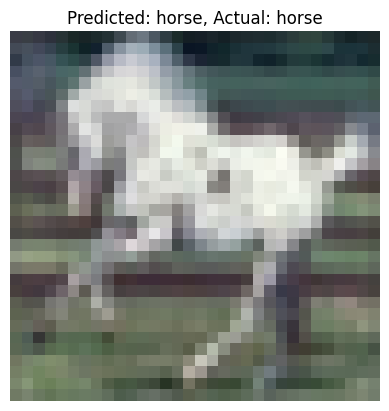

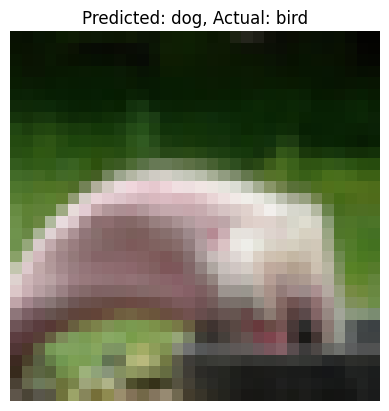

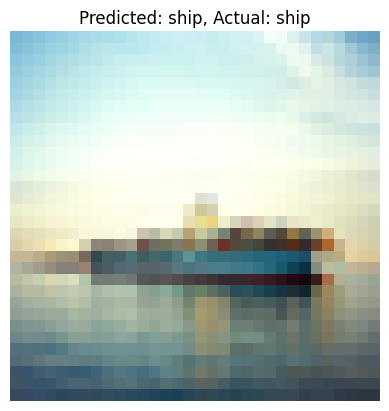

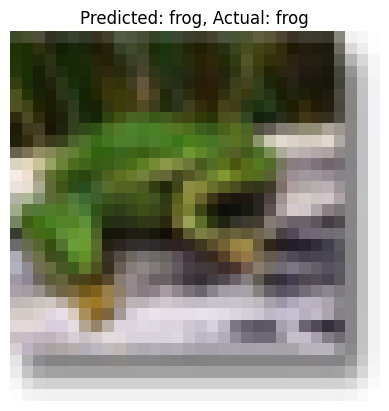

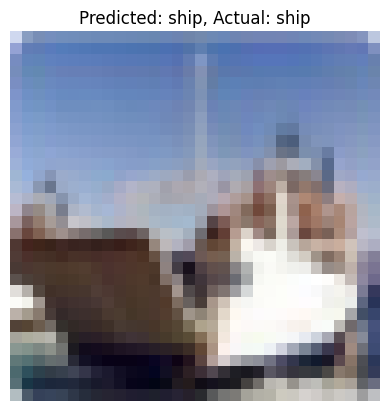

In [ ]:
import random
import matplotlib.pyplot as plt
random_indices = random.sample(range(len(test_set)), 5)

for idx in random_indices:
    image, label = test_set[idx]
    predicted_category = classify_image(image)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_category}, Actual: {categories[label]}")
    plt.show()